In [1]:
# what is the daily change in price
# what is the daily return of the stock on average
# what was the moving avg of the stock
# what was the corellation between various stocks closing price
#''''''''''''''''''''''''''''''''''''''''''''''   daily returns
# how much value we put on risk by investing on a stock
# how can we predict future stock behaviour

In [9]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline



In [23]:

from pandas_datareader import DataReader
from datetime import datetime




In [24]:
#pip install pandas_datareader 

In [26]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
#globals() it is taking a string from tech_list and conver it to global variables and convert a string name to a dataframe name
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [27]:
# Summary Stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,115.647182,112.619133,114.227431,114.178835,1.304322e+08,113.916035
std,18.074892,17.566169,17.977693,17.783223,5.226250e+07,17.907476
min,73.422501,71.580002,72.292503,73.290001,4.669130e+07,72.726265
25%,108.302502,101.962498,103.712502,106.549999,9.206895e+07,106.112469
50%,120.419998,116.809998,118.919998,119.019997,1.152152e+08,118.637726
75%,128.812500,125.825001,127.750000,127.799999,1.545972e+08,127.629280
max,145.089996,141.369995,143.600006,143.160004,3.743368e+08,142.946396


In [28]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-05-04 to 2021-04-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       251 non-null    float64
 1   Low        251 non-null    float64
 2   Open       251 non-null    float64
 3   Close      251 non-null    float64
 4   Volume     251 non-null    float64
 5   Adj Close  251 non-null    float64
dtypes: float64(6)
memory usage: 13.7 KB


In [31]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-04,73.422501,71.580002,72.292503,73.290001,133568000.0,72.726265
2020-05-05,75.250000,73.614998,73.764999,74.389999,147751200.0,73.817802
2020-05-06,75.809998,74.717499,75.114998,75.157501,142333600.0,74.579391
2020-05-07,76.292503,75.492500,75.805000,75.934998,115215200.0,75.350914
2020-05-08,77.587502,76.072502,76.410004,77.532501,133838400.0,77.144394
...,...,...,...,...,...,...
2021-04-26,135.059998,133.559998,134.830002,134.720001,66905100.0,134.720001
2021-04-27,135.410004,134.110001,135.009995,134.389999,66015800.0,134.389999
2021-04-28,135.020004,133.080002,134.309998,133.580002,107760100.0,133.580002


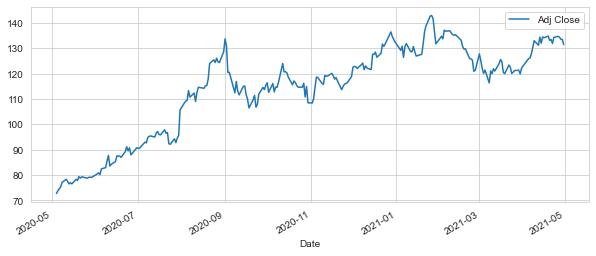

In [36]:
# Let's see a historical view of the closing price
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

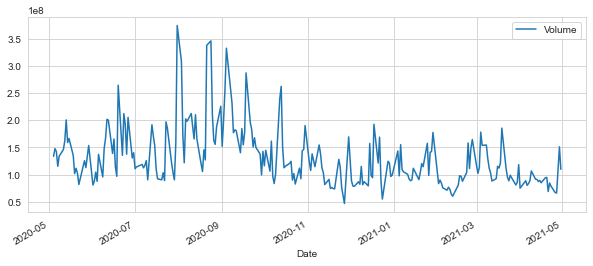

In [37]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
AAPL['Volume'].plot(legend=True,figsize=(10,4))


In [45]:
# Luckily pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=AAPL['Adj Close'].rolling(window=ma).mean()

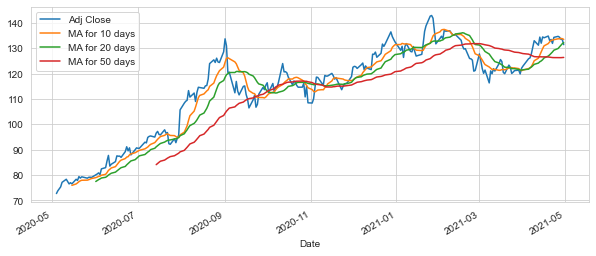

In [50]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

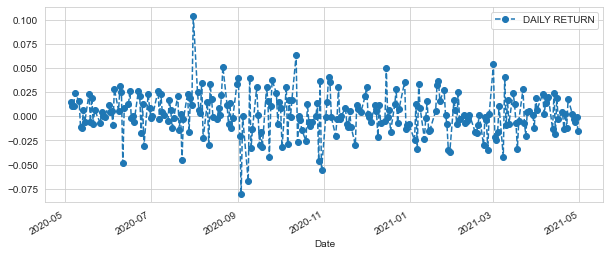

In [55]:
AAPL['DAILY RETURN'] = AAPL['Adj Close'].pct_change()# pct_change() will calculate the percentage change per day
AAPL['DAILY RETURN'].plot(legend=True,figsize=(10,4),linestyle='--',marker='o')

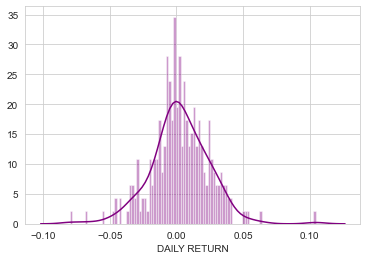

In [56]:
sns.distplot(AAPL['DAILY RETURN'].dropna(),bins=100,color='purple')

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  1.,  2.,  0.,  2.,  0.,  0.,  1.,  3.,  3.,
         2.,  5.,  1.,  2.,  2.,  1.,  5.,  3.,  5.,  5.,  8.,  4.,  6.,
        13., 11.,  8., 16.,  9., 13.,  6., 11.,  8.,  6.,  7.,  9.,  6.,
         8.,  6.,  4.,  3.,  8.,  5.,  4.,  3.,  3.,  4.,  3.,  3.,  2.,
         2.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.0800609 , -0.0782134 , -0.07636591, -0.07451841, -0.07267092,
        -0.07082342, -0.06897593, -0.06712843, -0.06528094, -0.06343344,
        -0.06158594, -0.05973845, -0.05789095, -0.05604346, -0.05419596,
        -0.05234847, -0.05050097, -0.04865348, -0.04680598, -0.04495849,
        -0.04311099, -0.0412635 , -0.039416  , -0.0375685 , -0.03572101,
        -0.03387351, -0.03202602, -0.03017852, -0.02833103, -0.026483

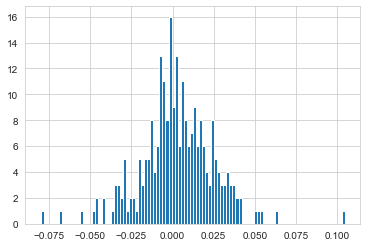

In [57]:
plt.hist(AAPL['DAILY RETURN'].dropna(),bins=100)

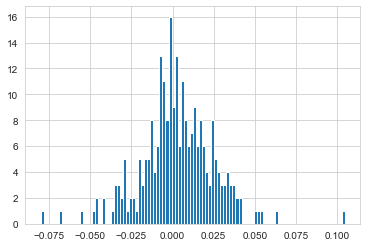

In [60]:
AAPL['DAILY RETURN'].dropna().hist(bins=100)

In [61]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [62]:
closing_df

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-05-04,72.726265,1326.800049,177.040894,2315.989990
2020-05-05,73.817802,1351.109985,178.941589,2317.800049
2020-05-06,74.579391,1347.300049,180.703674,2351.260010
2020-05-07,75.350914,1372.560059,181.753021,2367.610107
2020-05-08,77.144394,1388.369995,182.822144,2379.610107
...,...,...,...,...
2021-04-26,134.720001,2326.739990,261.549988,3409.000000
2021-04-27,134.389999,2307.120117,261.970001,3417.429932
2021-04-28,133.580002,2379.909912,254.559998,3458.500000


In [63]:
tech_rets = closing_df.pct_change()

In [64]:
tech_rets

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-05-04,NaN,NaN,NaN,NaN
2020-05-05,0.015009,0.018322,0.010736,0.000782
2020-05-06,0.010317,-0.002820,0.009847,0.014436
2020-05-07,0.010345,0.018749,0.005807,0.006954
2020-05-08,0.023802,0.011519,0.005882,0.005068
...,...,...,...,...
2021-04-26,0.002978,0.004941,0.001532,0.020390
2021-04-27,-0.002450,-0.008432,0.001606,0.002473
2021-04-28,-0.006027,0.031550,-0.028286,0.012018


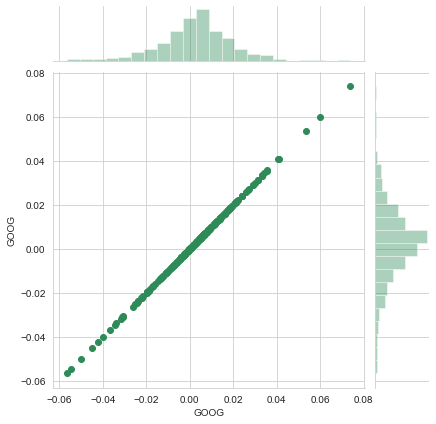

In [69]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG',y='GOOG',data=tech_rets,kind='scatter',color='seagreen')#r==1 pearson=1

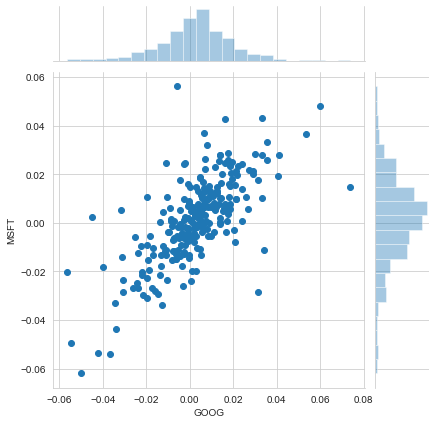

In [70]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

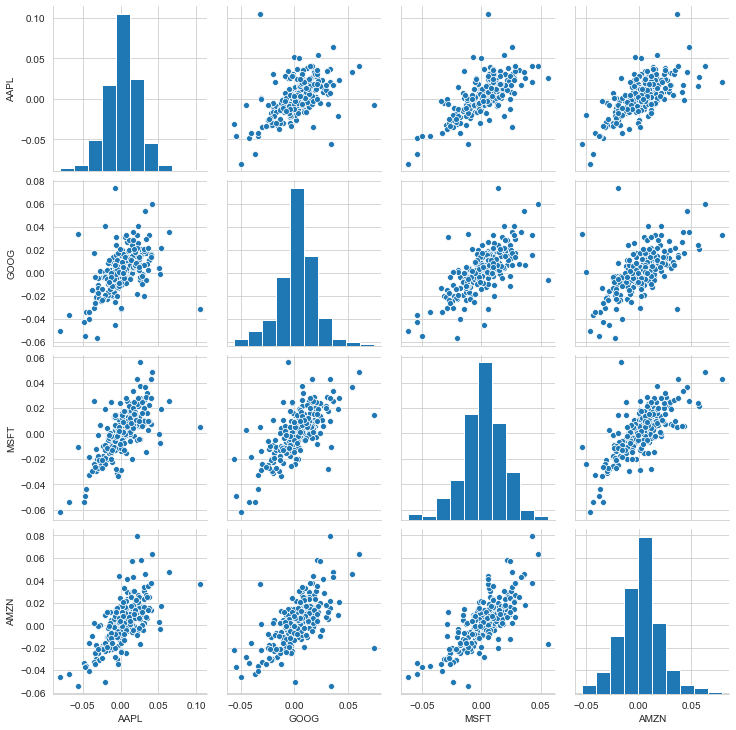

In [72]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

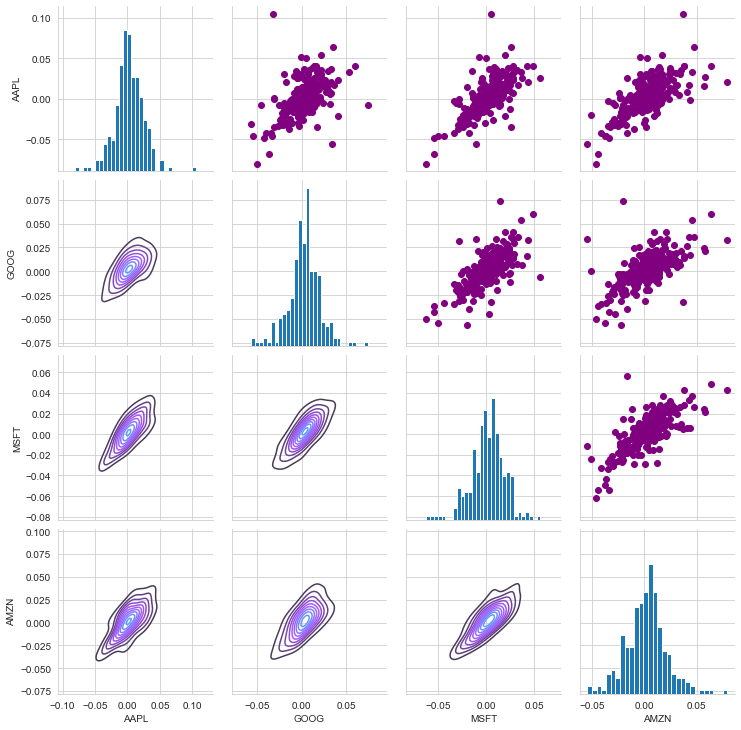

In [73]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)


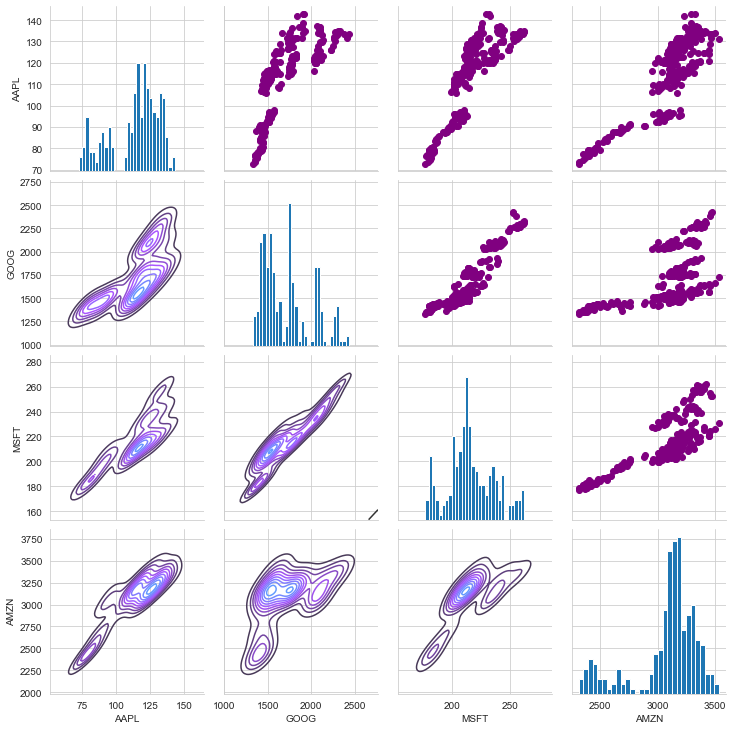

In [74]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)


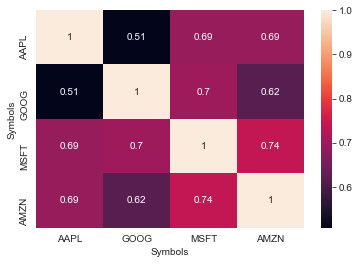

In [82]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.dropna().corr(),annot=True)

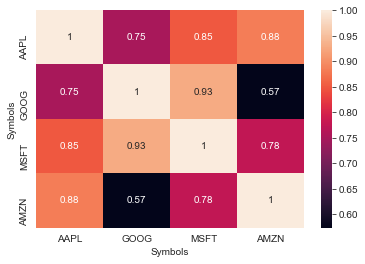

In [84]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(closing_df.dropna().corr(),annot=True)

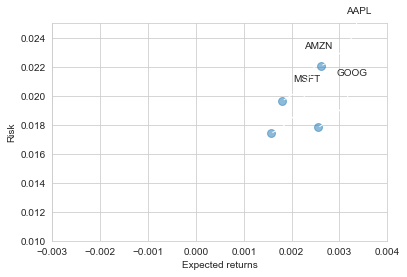

In [86]:
rets = tech_rets.dropna()
area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

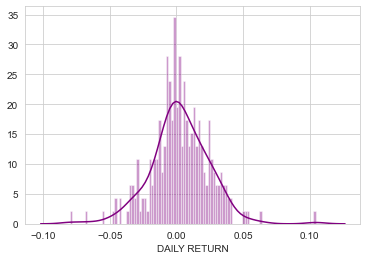

In [88]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['DAILY RETURN'].dropna(),bins=100,color='purple')

In [89]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)


-0.03320439878572928